In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
solos_df = pd.read_csv('wrangled_train_solos_df.csv', index_col=0)

In [3]:
solos_df.head()

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,315c96c26c9aac,0,0,100.00,0,0,45,0,1,1,...,1560,0.0,0,0.00,0,0,49.75,2,0,0.1875
1,311b84c6ff4390,0,0,8.54,0,0,48,1000,0,0,...,-1,2004.0,0,0.00,0,0,1089.00,6,1500,0.7370
2,b7807186e3f679,0,1,324.20,1,5,5,986,4,1,...,-1,1228.0,0,76.80,0,0,2050.00,6,1462,0.8750
3,92022479b92ce7,0,3,254.20,0,12,13,0,2,1,...,1536,2368.0,0,15.29,0,0,1787.00,3,0,0.8213
4,47143f942503e0,0,0,136.90,0,0,37,0,1,1,...,1500,0.0,0,0.00,0,0,270.80,1,0,0.3474


In [4]:
solos_df.describe()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,...,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000,719935.000000
mean,0.060911,1.060325,118.633610,0.247729,1.013273,47.496291,447.312046,0.931581,0.474193,21.526636,...,966.902338,463.387331,0.005117,5.090264,0.011450,0.004514,955.432587,3.583660,557.157886,0.487390
std,0.285385,1.799858,165.469255,0.648921,2.405053,27.716368,595.075806,1.571316,0.562464,46.526939,...,744.253353,1374.161065,0.088000,34.209275,0.106389,0.069638,1069.792064,2.579846,728.765955,0.298442
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.400000,2.000000,0.000000,0.229200
50%,0.000000,0.000000,74.200000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,...,1496.000000,0.000000,0.000000,0.000000,0.000000,0.000000,502.800000,3.000000,0.000000,0.484000
75%,0.000000,2.000000,169.100000,0.000000,1.000000,71.000000,1090.000000,1.000000,1.000000,20.810000,...,1517.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1587.000000,5.000000,1492.000000,0.747600
max,21.000000,28.000000,5480.000000,26.000000,63.000000,100.000000,1970.000000,48.000000,18.000000,1002.000000,...,2857.000000,40700.000000,18.000000,1974.000000,1.000000,5.000000,25780.000000,153.000000,1922.000000,1.000000


In [5]:
solos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719935 entries, 0 to 719934
Data columns (total 24 columns):
Id                 719935 non-null object
assists            719935 non-null int64
boosts             719935 non-null int64
damageDealt        719935 non-null float64
headshotKills      719935 non-null int64
heals              719935 non-null int64
killPlace          719935 non-null int64
killPoints         719935 non-null int64
kills              719935 non-null int64
killStreaks        719935 non-null int64
longestKill        719935 non-null float64
matchDuration      719935 non-null int64
maxPlace           719935 non-null int64
numGroups          719935 non-null int64
rankPoints         719935 non-null int64
rideDistance       719935 non-null float64
roadKills          719935 non-null int64
swimDistance       719935 non-null float64
teamKills          719935 non-null int64
vehicleDestroys    719935 non-null int64
walkDistance       719935 non-null float64
weaponsAcquired  

## Linear Regression

Let's keep it simple to start off with, just a base Linear Regression model with no hyperparameter tuning and see how it turns out. We're using Linear Regression since we're trying to predict a contiunous variable (winPlacePerc) instead of a categorical variable.

In [6]:
X = solos_df.drop(['Id', 'winPlacePerc'], axis=1)
y = solos_df['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [7]:
linreg = LinearRegression()

In [8]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Taking a look at coefficients for the model can give interesting insights into how each variable is affecting the model's predictions.

In [9]:
coef_df = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])
coef_df = coef_df.sort_values('Coefficient', ascending=False)
coef_df

,Coefficient
roadKills,0.034107
assists,0.028018
weaponsAcquired,0.015854
boosts,0.011680
headshotKills,0.008753
numGroups,0.005772
maxPlace,0.001234
winPoints,0.000156
swimDistance,0.000135
walkDistance,0.000098


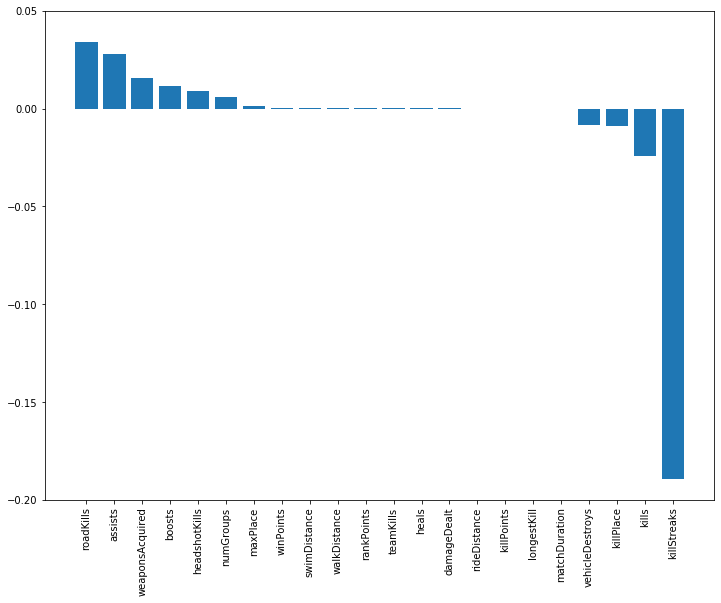

In [10]:
plt.figure(figsize=(12,9))
plt.bar(coef_df.index, coef_df['Coefficient'])
plt.xticks(rotation=90)
plt.ylim(-.2, .05)
plt.show()

Notable ones seem to be killStreaks and roadKills of all things. Seems like for every one kill streak added, your win place percentage actually goes down by about .2, while for every person you kill by running them over with a vehicle (yes you can do that), your win place percentage goes up by about .35. Some interesting results right away, and we haven't even predicted anything yet.

In [11]:
linreg_predict = linreg.predict(X_test)

In [12]:
training_accuracy = linreg.score(X_train, y_train)
test_accuracy = linreg.score(X_test, y_test)

print(f"Accuracy on training data: {training_accuracy}")
print(f"Accuracy on test data:     {test_accuracy}")

Accuracy on training data: 0.8830392823545725
Accuracy on test data:     0.8802941415447152


Pretty good accuracy on both training and testing data. No signs of overfitting which means it will generalize to new data well. Let's put the values and predictions into a dataframe then plot the results and residuals.

In [13]:
compare = y_test.to_frame()
compare.head()

,winPlacePerc
710443,0.7020
625623,0.1458
696302,0.7350
264598,0.4375
5674,0.9680


In [14]:
compare['linreg_predict'] = linreg_predict
compare.head(10)

,winPlacePerc,linreg_predict
710443,0.7020,0.730638
625623,0.1458,0.116776
696302,0.7350,0.759328
264598,0.4375,0.361094
5674,0.9680,0.955137
495928,0.3684,0.304490
174470,0.9375,0.786005
220480,0.6533,0.582709
597159,0.6090,0.560711
435996,0.2268,0.185694


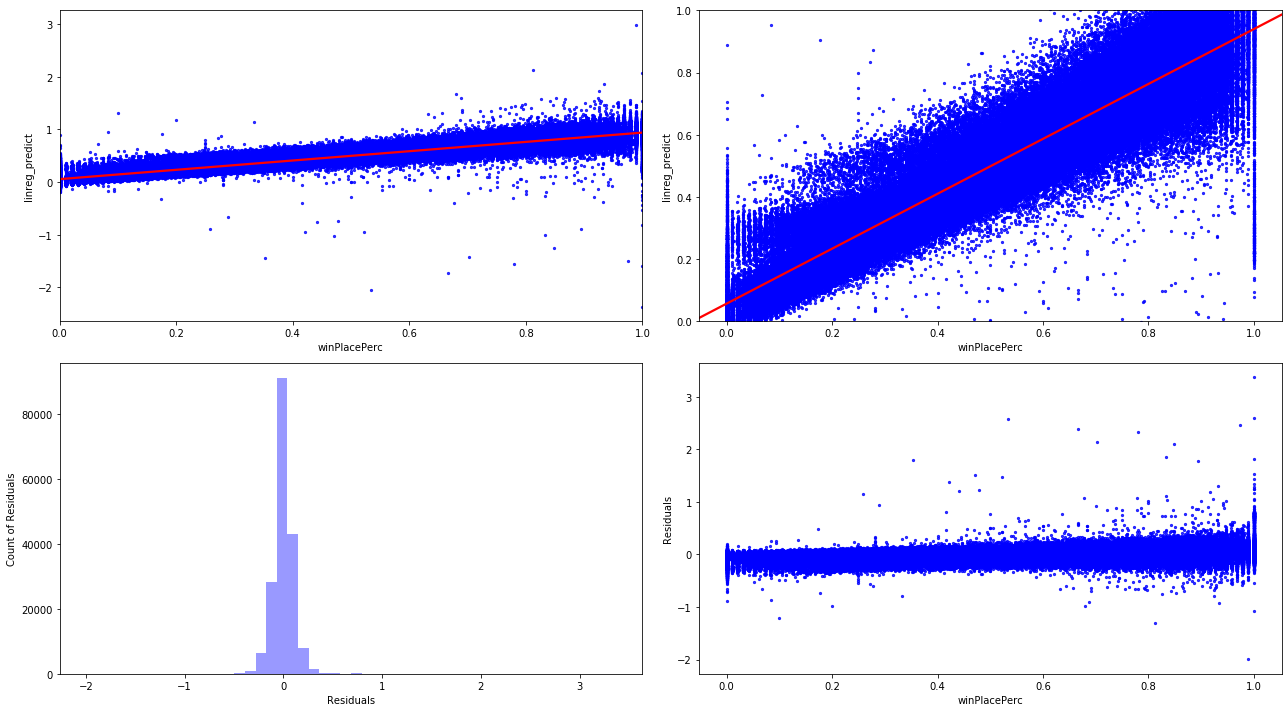

In [15]:
fig, axes = plt.subplots(2,2, figsize=(18,10))
axes = axes.flatten()
sns.regplot(x='winPlacePerc', y='linreg_predict', data=compare, color='blue', ax=axes[0], scatter_kws={'s':5}, line_kws={'color': 'red'})
axes[0].set_xlim((0,1))
sns.regplot(x='winPlacePerc', y='linreg_predict', data=compare, color='blue', ax=axes[1], scatter_kws={'s':5}, line_kws={'color': 'red'})
axes[1].set_ylim((0,1))
sns.distplot(y_test - linreg_predict, ax=axes[2], kde=False, color='blue')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Count of Residuals')
sns.regplot(y_test, y_test - linreg_predict, ax=axes[3], fit_reg=False, color='blue', scatter_kws={'s':5})
axes[3].set_ylabel('Residuals')

fig.tight_layout()
plt.show()

Graphs look good, definitely some outliers in there, but nothing too extraoridnary. It's not good that the model is predicting values above 1 and below 0, however. As winPlacePerc has to stay between 0 and 1, perhaps there is a way to tune the linear regression model to only predict values between 0 and 1. Best place to start would be taking the log of the target variable, then taking the exponential to get all of the negative values out of the predictions.

First we need to get all of the winPlacePerc's of 0 out of the dataset. Taking the natural log of 0 is not possible so getting those out will allow us to do this analysis.

In [16]:
zero_count = solos_df[solos_df['winPlacePerc'] == 0.0]['Id'].count()
print(zero_count)
print(zero_count / len(solos_df))

21904
0.03042496892080535


Looks like only 3% of our dataset has values of 0 in the winPlacePerc column. That is a small enough number to not do much harm to the integrity of the model.

In [17]:
zeros = solos_df[solos_df['winPlacePerc'] == 0.0]
zeros.head()

,Id,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
15,de93ba20446980,0,0,19.34,0,0,96,0,0,0,...,1500,0.0,0,0.0,0,0,20.34,1,0,0.0
86,5c654ee06cb3e5,0,0,0.00,0,0,91,0,0,0,...,1500,0.0,0,0.0,0,0,0.00,0,0,0.0
102,30131ea60bc193,0,0,0.00,0,0,90,0,0,0,...,1496,0.0,0,0.0,0,0,0.00,0,0,0.0
106,604d3aa575de95,0,0,0.00,0,0,90,1027,0,0,...,-1,0.0,0,0.0,0,0,0.00,0,1504,0.0
132,0df7c355497d77,0,0,0.00,0,0,5,0,0,0,...,1500,0.0,0,0.0,0,0,0.00,6,0,0.0


In [18]:
solos_df = solos_df.drop(zeros.index)

Now that we dropped out the zero values, we need to take the natural log of the target variable, then plug that into the Linear Regression model.

In [19]:
X = solos_df.drop(['Id', 'winPlacePerc'], axis=1)
y = np.log(solos_df['winPlacePerc'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [20]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that we have a fit model, let's predict, then exponentiate those predictions to get back our true winPlacePerc values.

In [21]:
log_predict = linreg.predict(X_test)
log_predict = np.exp(log_predict)

In [22]:
log_compare = np.exp(y_test).to_frame()
log_compare['log_linreg_predict'] = log_predict

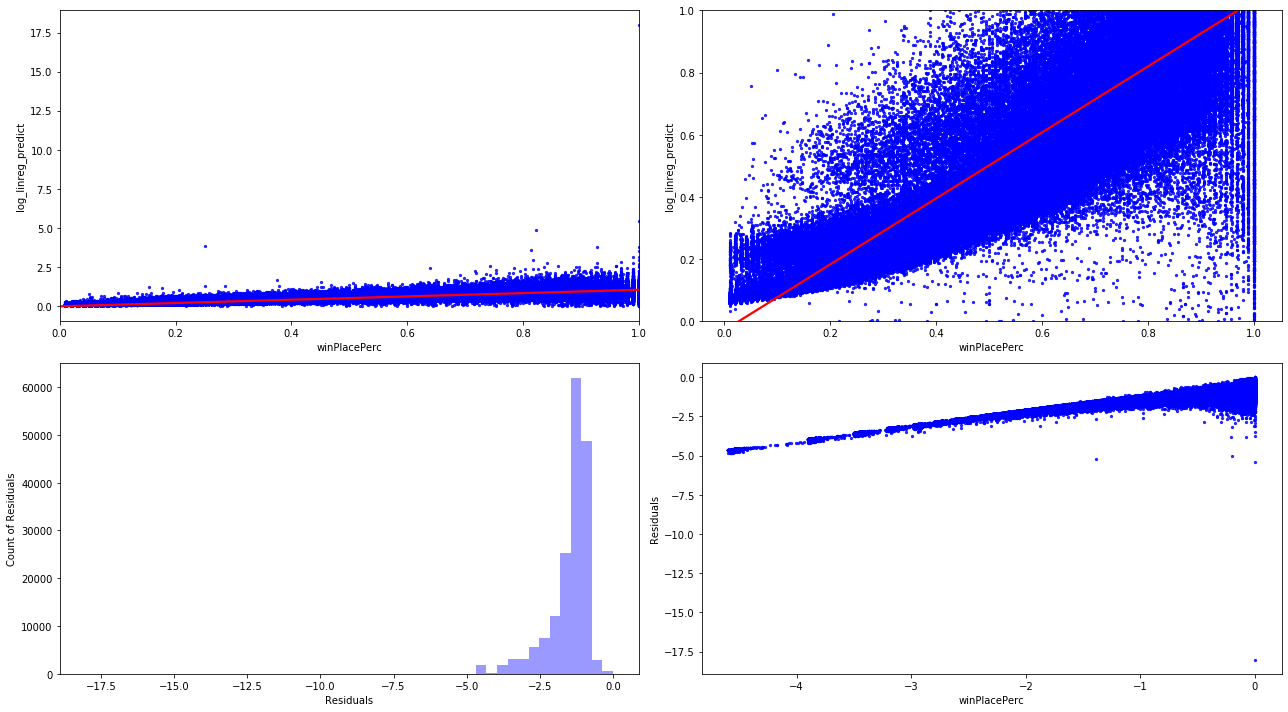

In [23]:
fig, axes = plt.subplots(2,2, figsize=(18,10))
axes = axes.flatten()
sns.regplot(x='winPlacePerc', y='log_linreg_predict', data=log_compare, color='blue', ax=axes[0], scatter_kws={'s':5}, line_kws={'color': 'red'})
axes[0].set_xlim((0,1))
sns.regplot(x='winPlacePerc', y='log_linreg_predict', data=log_compare, color='blue', ax=axes[1], scatter_kws={'s':5}, line_kws={'color': 'red'})
axes[1].set_ylim((0,1))
sns.distplot(y_test - log_predict, ax=axes[2], kde=False, color='blue')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Count of Residuals')
sns.regplot(y_test, y_test - log_predict, ax=axes[3], fit_reg=False, color='blue', scatter_kws={'s':5})
axes[3].set_ylabel('Residuals')

fig.tight_layout()
plt.show()

No real improvement, the max of these new predictions is around 17.5, however it does seem like doing this got rid of the negative values, which is an improvement over the old model. Let's take a look at how the new model scored compared to the base Linear Regression model.

In [24]:
training_accuracy = linreg.score(X_train, y_train)
test_accuracy = linreg.score(X_test, y_test)

print(f"Accuracy on training data: {training_accuracy}")
print(f"Accuracy on test data:     {test_accuracy}")

Accuracy on training data: 0.7695967286597318
Accuracy on test data:     0.767492366591222


Worse than the base model. What about after dropping that huge outlier?

In [25]:
max_log_compare = log_compare[log_compare['log_linreg_predict'] == max(log_compare['log_linreg_predict'])]
max_log_compare

,winPlacePerc,log_linreg_predict
586038,1.0,18.013382


In [26]:
log_compare.drop(max_log_compare.index, inplace=True)

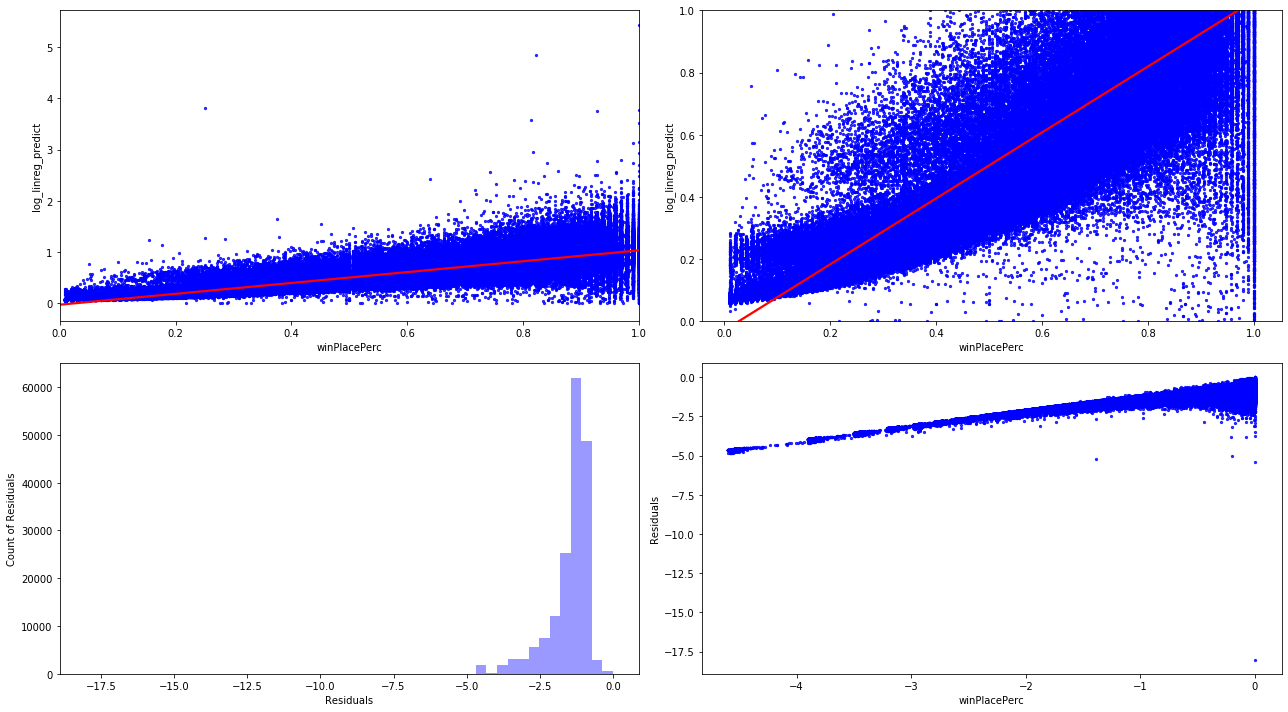

In [27]:
fig, axes = plt.subplots(2,2, figsize=(18,10))
axes = axes.flatten()
sns.regplot(x='winPlacePerc', y='log_linreg_predict', data=log_compare, color='blue', ax=axes[0], scatter_kws={'s':5}, line_kws={'color': 'red'})
axes[0].set_xlim((0,1))
sns.regplot(x='winPlacePerc', y='log_linreg_predict', data=log_compare, color='blue', ax=axes[1], scatter_kws={'s':5}, line_kws={'color': 'red'})
axes[1].set_ylim((0,1))
sns.distplot(y_test - log_predict, ax=axes[2], kde=False, color='blue')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Count of Residuals')
sns.regplot(y_test, y_test - log_predict, ax=axes[3], fit_reg=False, color='blue', scatter_kws={'s':5})
axes[3].set_ylabel('Residuals')

fig.tight_layout()
plt.show()

In [28]:
training_accuracy = linreg.score(X_train, y_train)
test_accuracy = linreg.score(X_test, y_test)

print(f"Accuracy on training data: {training_accuracy}")
print(f"Accuracy on test data:     {test_accuracy}")

Accuracy on training data: 0.7695967286597318
Accuracy on test data:     0.767492366591222


No improvement. So taking the log the target values did not provide any real improvement over not taking the log and using a base Linear Regression model.

Now there are two other types of Linear Regression, Lasso and Ridge regression. These two types of regression regularize the data, and could provide some benefit and make a better model. These types of models take inputs though in the terms of alpha values, so let's use pipeline and GridSearchCV to find us the best possible alpha value for both models.

In [29]:
solos_df = pd.read_csv('wrangled_train_solos_df.csv', index_col=0)

In [30]:
X = solos_df.drop(['Id', 'winPlacePerc'], axis=1)
y = solos_df['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [31]:
steps = [('lasso', Lasso(random_state=11))]
param_grid = {'lasso__alpha': [0.01, 0.1, .5, .75, 1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
pipeline = Pipeline(steps)
cv = GridSearchCV(pipeline, param_grid, cv = 5)
cv.fit(X_train, y_train)
best_lasso_alpha = cv.best_params_['lasso__alpha']
print(best_lasso_alpha)

0.01


In [32]:
steps = [('ridge', Ridge(random_state=11))]
param_grid = {'ridge__alpha': np.arange(10,1000,10)}
pipeline = Pipeline(steps)
cv = GridSearchCV(pipeline, param_grid, cv = 5)
cv.fit(X_train, y_train)
best_ridge_alpha = cv.best_params_['ridge__alpha']
print(best_ridge_alpha)

190


With alpha values picked out, it's time to test how Lasso and Ridge regression compare to the Linear regression model.

## Lasso Regression

In [33]:
lasso = Lasso(alpha=best_lasso_alpha)
lasso_fit = lasso.fit(X_train, y_train)

In [34]:
lasso_coef = lasso_fit.coef_
lasso_coef_df = pd.DataFrame(lasso_coef, X.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)
lasso_coef_df

,Coefficient
weaponsAcquired,0.016130
boosts,0.005917
numGroups,0.004809
maxPlace,0.000326
winPoints,0.000188
swimDistance,0.000139
walkDistance,0.000122
rankPoints,0.000115
rideDistance,0.000021
vehicleDestroys,-0.000000


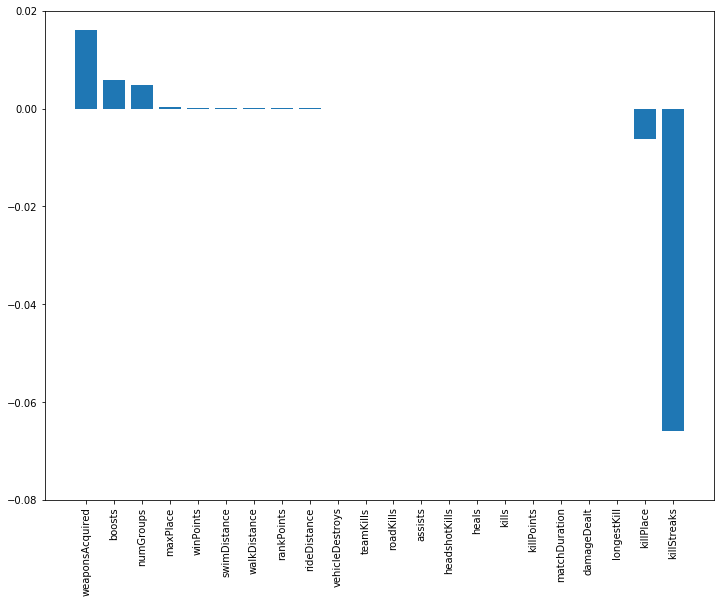

In [35]:
plt.figure(figsize=(12,9))
plt.bar(lasso_coef_df.index, lasso_coef_df['Coefficient'])
plt.xticks(rotation=90)
plt.ylim(-.08, .02)
plt.show()

Interesting change in results here, the coefficients don't seem to have as much of an effect on the predictions, however a new top dog has emerged wtih weapons acquired being the largest factor in positive effect on win place percentage predictions, while kill streaks still remain the largest factor in negative effect on predictions.

In [36]:
lasso_pred = lasso.predict(X_test)

In [37]:
compare = y_test.to_frame()
compare['linreg_predict'] = linreg_predict
compare['lasso_predict'] = lasso_pred
compare.head()

,winPlacePerc,linreg_predict,lasso_predict
710443,0.7020,0.730638,0.714523
625623,0.1458,0.116776,0.116219
696302,0.7350,0.759328,0.721838
264598,0.4375,0.361094,0.323879
5674,0.9680,0.955137,0.942539


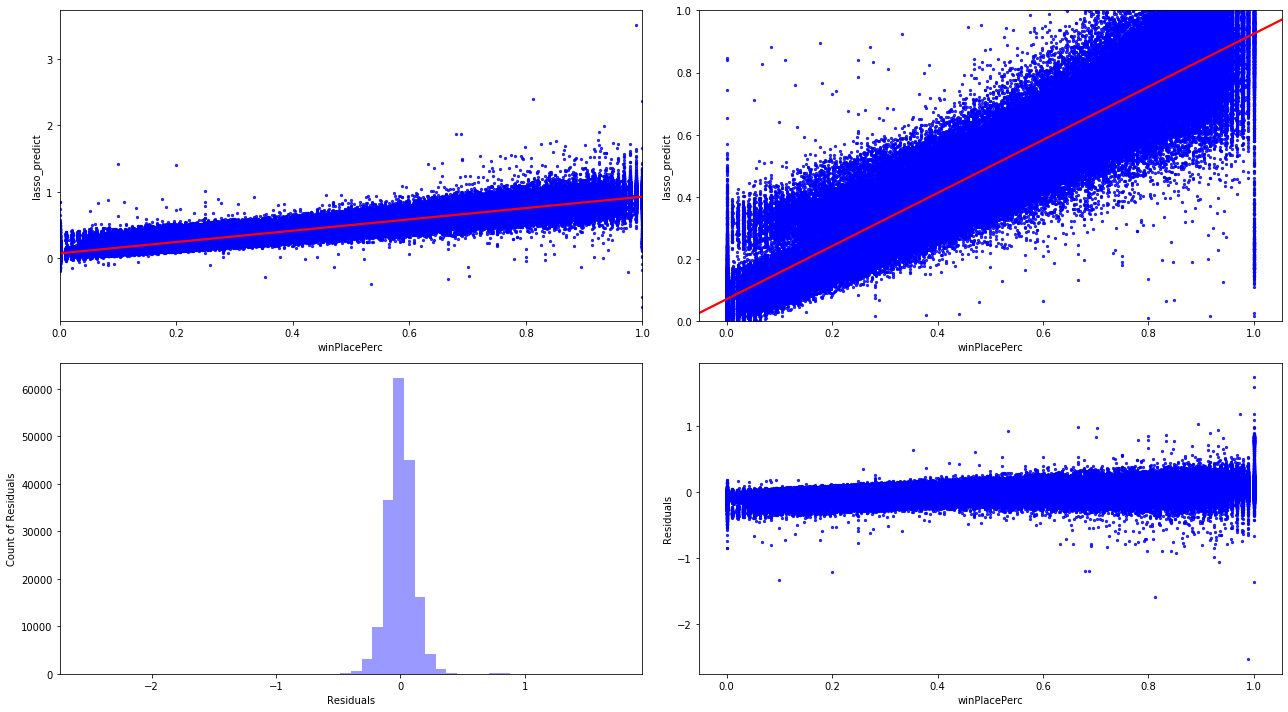

In [38]:
fig, axes = plt.subplots(2,2, figsize=(18,10))
axes = axes.flatten()
sns.regplot(x='winPlacePerc', y='lasso_predict', data=compare, color='blue', ax=axes[0], scatter_kws={'s':5}, line_kws={'color': 'red'})
axes[0].set_xlim((0,1))
sns.regplot(x='winPlacePerc', y='lasso_predict', data=compare, color='blue', ax=axes[1], scatter_kws={'s':5}, line_kws={'color': 'red'})
axes[1].set_ylim((0,1))
sns.distplot(y_test - lasso_pred, ax=axes[2], kde=False, color='blue')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Count of Residuals')
sns.regplot(y_test, y_test - lasso_pred, ax=axes[3], fit_reg=False, color='blue', scatter_kws={'s':5})
axes[3].set_ylabel('Residuals')

fig.tight_layout()
plt.show()

Good looking graphs, appears to be about the same as the base linear regression model.

In [39]:
compare['lasso_predict'].max(), compare['lasso_predict'].min()

(3.5168042032271227, -0.7341444349771057)

Still having problems with numbers going over 1 and below 0 for predicting winPlacePerc, and it's gotten worse with the Lasso regression.

In [40]:
training_accuracy = lasso.score(X_train, y_train)
test_accuracy = lasso.score(X_test, y_test)

print(f"Accuracy on training data: {training_accuracy}")
print(f"Accuracy on test data:     {test_accuracy}")

Accuracy on training data: 0.8653146183082242
Accuracy on test data:     0.8647296106525555


Lasso regression is actually doing slightly worse than the linear regression model, at only 86% accuracy compared to the 88% linear regression gave us.

Right away, just by testing the accuracy of these models, we can see that the Linear Regression model is doing better. However, that is not the only way to tell how well the model is doing. Mean squared error and root mean squared error are two other metricsto give us an idea on how accurate our model is. Let's take a look at the MSE and RMSE of the linear regression model and lasso model

In [41]:
linreg_mse = mean_squared_error(y_test, linreg_predict)
linreg_rmse = linreg_mse ** (1/2)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = lasso_mse ** (1/2)

In [42]:
print(f'Linear Regression MSE:  {linreg_mse}')
print(f'Linear Regression RMSE: {linreg_rmse}')
print('\n')
print(f'Lasso Regression MSE:   {lasso_mse}')
print(f'Lasso Regression RMSE:  {lasso_rmse}')

Linear Regression MSE:  0.01067518915892932
Linear Regression RMSE: 0.1033208069990228


Lasso Regression MSE:   0.012063210710989527
Lasso Regression RMSE:  0.10983264865689768


Overall, it seems that the base linear regression model is a better fit for the data. Lower MSE and RMSE scores are better, and the linear regression model gave us a lower number for both metrics. Now what about Ridge regression? Will that do any better than Lasso?

## Ridge Regression

In [43]:
ridge = Ridge(alpha=best_ridge_alpha)
ridge_fit = ridge.fit(X_train, y_train)

In [44]:
ridge_coef = ridge_fit.coef_
ridge_coef_df = pd.DataFrame(ridge_coef, X.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)
ridge_coef_df

,Coefficient
roadKills,0.032280
assists,0.027810
weaponsAcquired,0.015873
boosts,0.011690
headshotKills,0.008720
numGroups,0.005763
maxPlace,0.001232
winPoints,0.000156
swimDistance,0.000135
walkDistance,0.000098


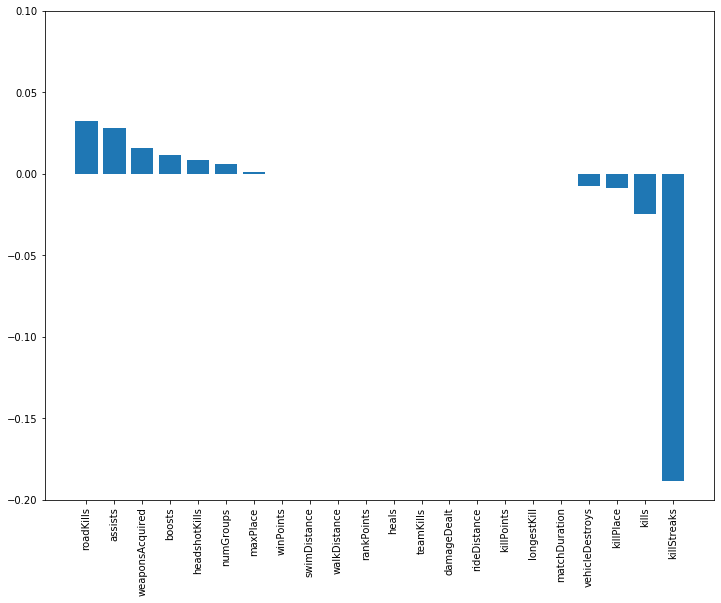

In [45]:
plt.figure(figsize=(12,9))
plt.bar(ridge_coef_df.index, ridge_coef_df['Coefficient'])
plt.xticks(rotation=90)
plt.ylim(-.2, .1)
plt.show()

In Ridge regression, kill streaks is still the largest negative effect, but road kills have moved back into 1st place on largest positive effect on predictions.

In [46]:
ridge_pred = ridge.predict(X_test)
compare['ridge_predict'] = ridge_pred
compare.head()

,winPlacePerc,linreg_predict,lasso_predict,ridge_predict
710443,0.7020,0.730638,0.714523,0.730345
625623,0.1458,0.116776,0.116219,0.116782
696302,0.7350,0.759328,0.721838,0.758941
264598,0.4375,0.361094,0.323879,0.360929
5674,0.9680,0.955137,0.942539,0.955096


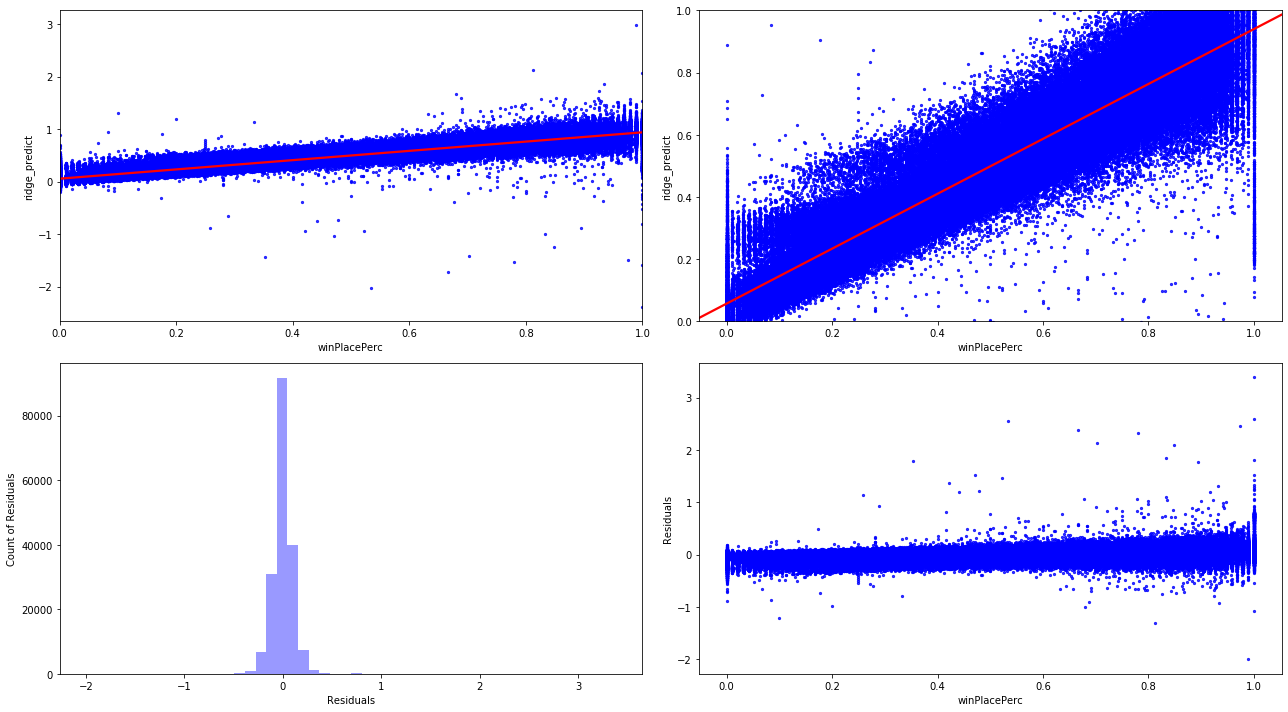

In [47]:
fig, axes = plt.subplots(2,2, figsize=(18,10))
axes = axes.flatten()
sns.regplot(x='winPlacePerc', y='ridge_predict', data=compare, color='blue', ax=axes[0], scatter_kws={'s':5}, line_kws={'color': 'red'})
axes[0].set_xlim((0,1))
sns.regplot(x='winPlacePerc', y='ridge_predict', data=compare, color='blue', ax=axes[1], scatter_kws={'s':5}, line_kws={'color': 'red'})
axes[1].set_ylim((0,1))
sns.distplot(y_test - ridge_pred, ax=axes[2], kde=False, color='blue')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Count of Residuals')
sns.regplot(y_test, y_test - ridge_pred, ax=axes[3], fit_reg=False, color='blue', scatter_kws={'s':5})
axes[3].set_ylabel('Residuals')

fig.tight_layout()
plt.show()

In [48]:
training_accuracy = ridge.score(X_train, y_train)
test_accuracy = ridge.score(X_test, y_test)

print(f"Accuracy on training data: {training_accuracy}")
print(f"Accuracy on test data:     {test_accuracy}")

Accuracy on training data: 0.8830383095465093
Accuracy on test data:     0.8803060524354734


In [49]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = ridge_mse ** (1/2)

In [50]:
print(f'Linear Regression MSE:  {linreg_mse}')
print(f'Linear Regression RMSE: {linreg_rmse}')
print('\n')
print(f'Lasso Regression MSE:   {lasso_mse}')
print(f'Lasso Regression RMSE:  {lasso_rmse}')
print('\n')
print(f'Ridge Regression MSE:   {ridge_mse}')
print(f'Ridge Regression RMSE:  {ridge_rmse}')

Linear Regression MSE:  0.01067518915892932
Linear Regression RMSE: 0.1033208069990228


Lasso Regression MSE:   0.012063210710989527
Lasso Regression RMSE:  0.10983264865689768


Ridge Regression MSE:   0.010674126963531903
Ridge Regression RMSE:  0.10331566659288369


Seems like a toss up between Linear regression and Ridge regression, both outdoing Lasso regression.